In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
filein = os.path.join("data", "Muons", "MarginalMuons_wt_0ar39_cut265PE.csv")
muons = pd.read_csv(filein, index_col=False)

In [16]:
muons["std"] = muons.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)

In [21]:
len(muons[muons.pedetected==1]) / len(muons)

0.2528966476131624

In [36]:
filein = os.path.join("data", "Ar39", "Ar39_1Pileup_cut265PE.csv")
ar39_1 = pd.read_csv(filein, index_col=False)
filein = os.path.join("data", "Ar39", "Ar39_2Pileup_cut265PE.csv")
ar39_2 = pd.read_csv(filein, index_col=False)
filein = os.path.join("data", "Ar39", "Ar39_3Pileup_cut265PE.csv")
ar39_3 = pd.read_csv(filein, index_col=False)
filein = os.path.join("data", "Ar39", "Ar39_5Pileup_cut265PE.csv")
ar39_5 = pd.read_csv(filein, index_col=False)
filein = os.path.join("data", "Ar39", "Ar39_7Pileup_cut265PE.csv")
ar39_7 = pd.read_csv(filein, index_col=False)

In [37]:
ar39_1["std"] = ar39_1.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)
ar39_2["std"] = ar39_2.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)
ar39_3["std"] = ar39_3.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)
ar39_5["std"] = ar39_5.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)
ar39_7["std"] = ar39_7.apply(lambda row: np.std([it for l in [[i] * int(row[2+i]) for i in range(72)] for it in l]
), axis=1)

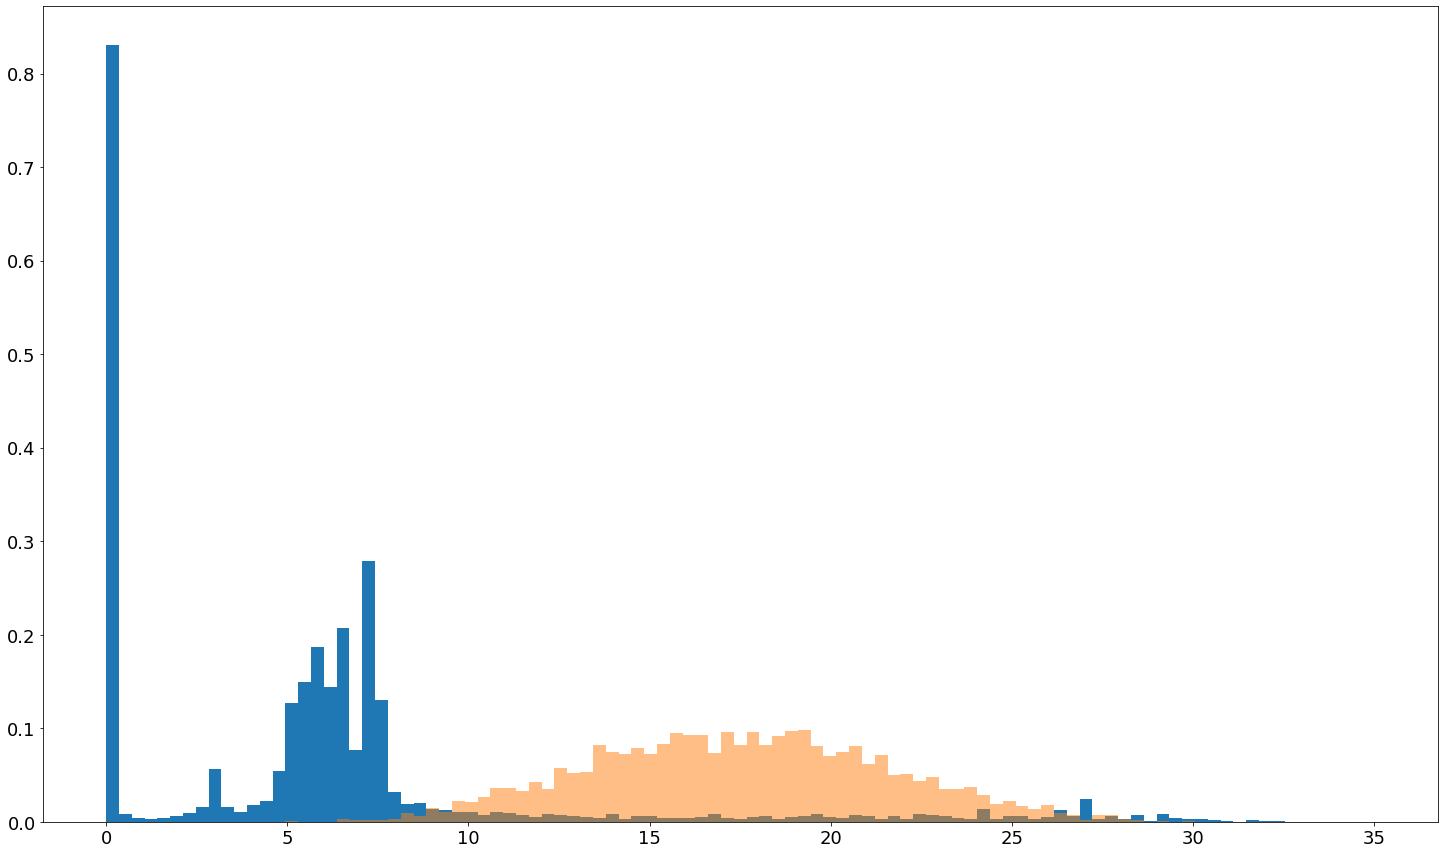

In [40]:
alpha=0.5
bins = np.linspace(0, 35, 100)
plt.hist(muons["std"], bins=bins, density=True)
#plt.hist(ar39_1["std"], bins=bins, density=True, alpha=alpha)
#plt.hist(ar39_3["std"], bins=bins, density=True, alpha=alpha)
#plt.hist(ar39_5["std"], bins=bins, density=True, alpha=alpha)
plt.hist(ar39_7["std"], bins=bins, density=True, alpha=alpha)
plt.show()

In [43]:
muon_slices = muons.iloc[:, 2:-1]

In [59]:
import math
shift = 15

muons_slices_firstquad = muon_slices.iloc[:, :math.ceil(72/2)]
muons_slices_secondquad = muon_slices.iloc[:, math.ceil(72/2):72]
muons_slices_thirdquad = muon_slices.iloc[:, shift:shift+math.ceil(72/2)]
muons_slices_fourthquad = pd.concat([muon_slices.iloc[:, shift+math.ceil(72/2):], muon_slices.iloc[:, :shift]], axis=1)

In [120]:
shift = 15
ar39_1_slices = ar39_1.iloc[:, 2:-1]
ar39_1_slices_firstquad = ar39_1_slices.iloc[:, :math.ceil(72/2)]
ar39_1_slices_secondquad = ar39_1_slices.iloc[:, math.ceil(72/2):72]
ar39_1_slices_thirdquad = ar39_1_slices.iloc[:, shift:shift+math.ceil(72/2)]
ar39_1_slices_fourthquad = pd.concat([ar39_1_slices.iloc[:, shift+math.ceil(72/2):], ar39_1_slices.iloc[:, :shift]], axis=1)

In [113]:
for quadrant in [muons_slices_firstquad, muons_slices_secondquad, muons_slices_thirdquad, muons_slices_fourthquad]:
    quadrant["std"] = quadrant.apply(lambda row: np.std([it for l in [[i] * int(row[i]) for i in range(36)] for it in l]
) if len([it for l in [[i] * int(row[i]) for i in range(36)] for it in l])>0 else -1, axis=1)
    quadrant["meanpe"] = quadrant.apply(lambda row: row[:36].mean(), axis=1)

/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [121]:
for quadrant in [ar39_1_slices_firstquad, ar39_1_slices_secondquad, ar39_1_slices_thirdquad, ar39_1_slices_fourthquad]:
    quadrant["std"] = quadrant.apply(lambda row: np.std([it for l in [[i] * int(row[i]) for i in range(36)] for it in l]
) if len([it for l in [[i] * int(row[i]) for i in range(36)] for it in l])>0 else -1, axis=1)
    quadrant["meanpe"] = quadrant.apply(lambda row: row[:36].mean(), axis=1)

/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


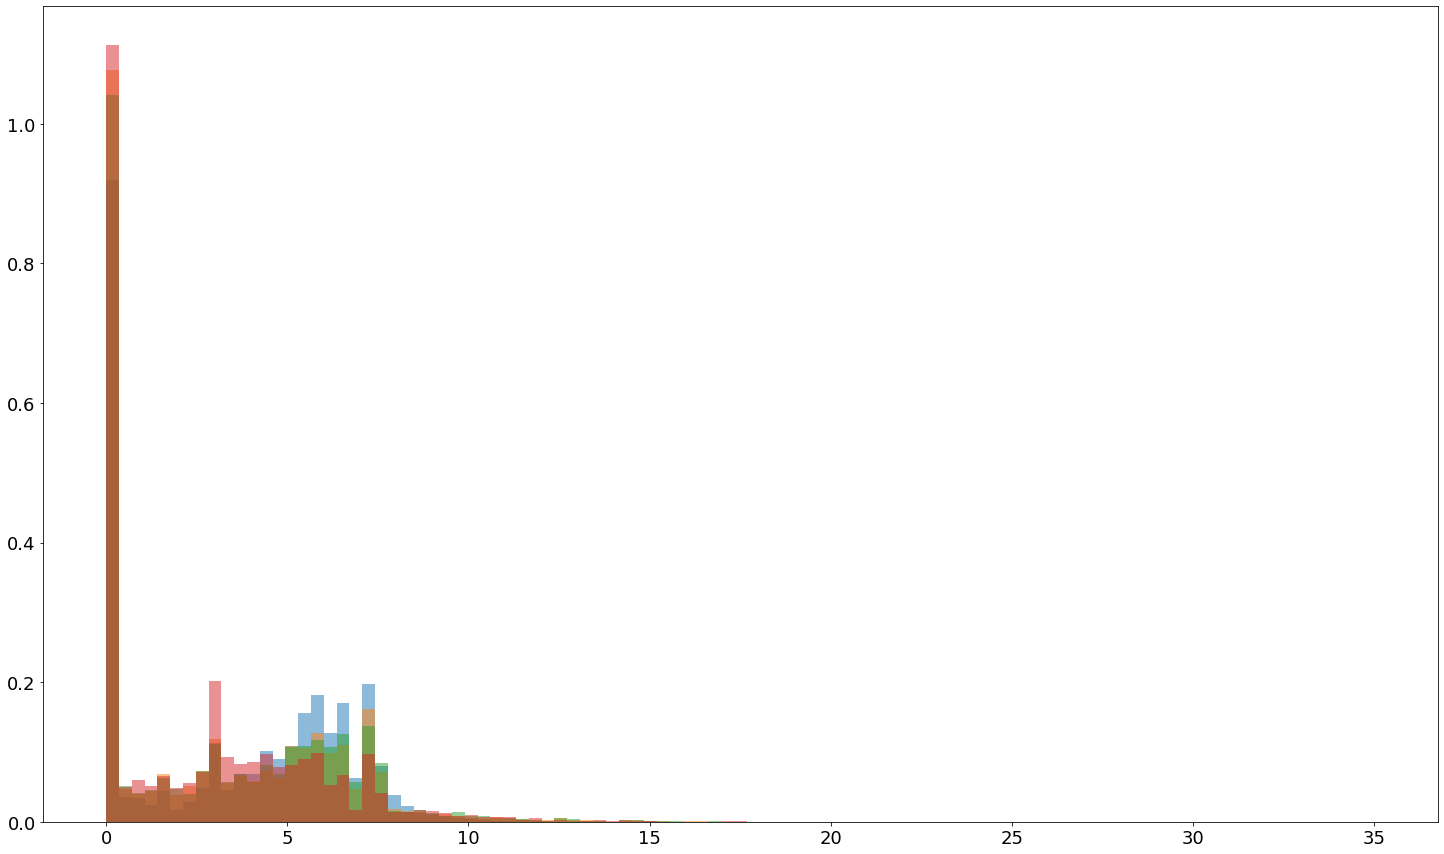

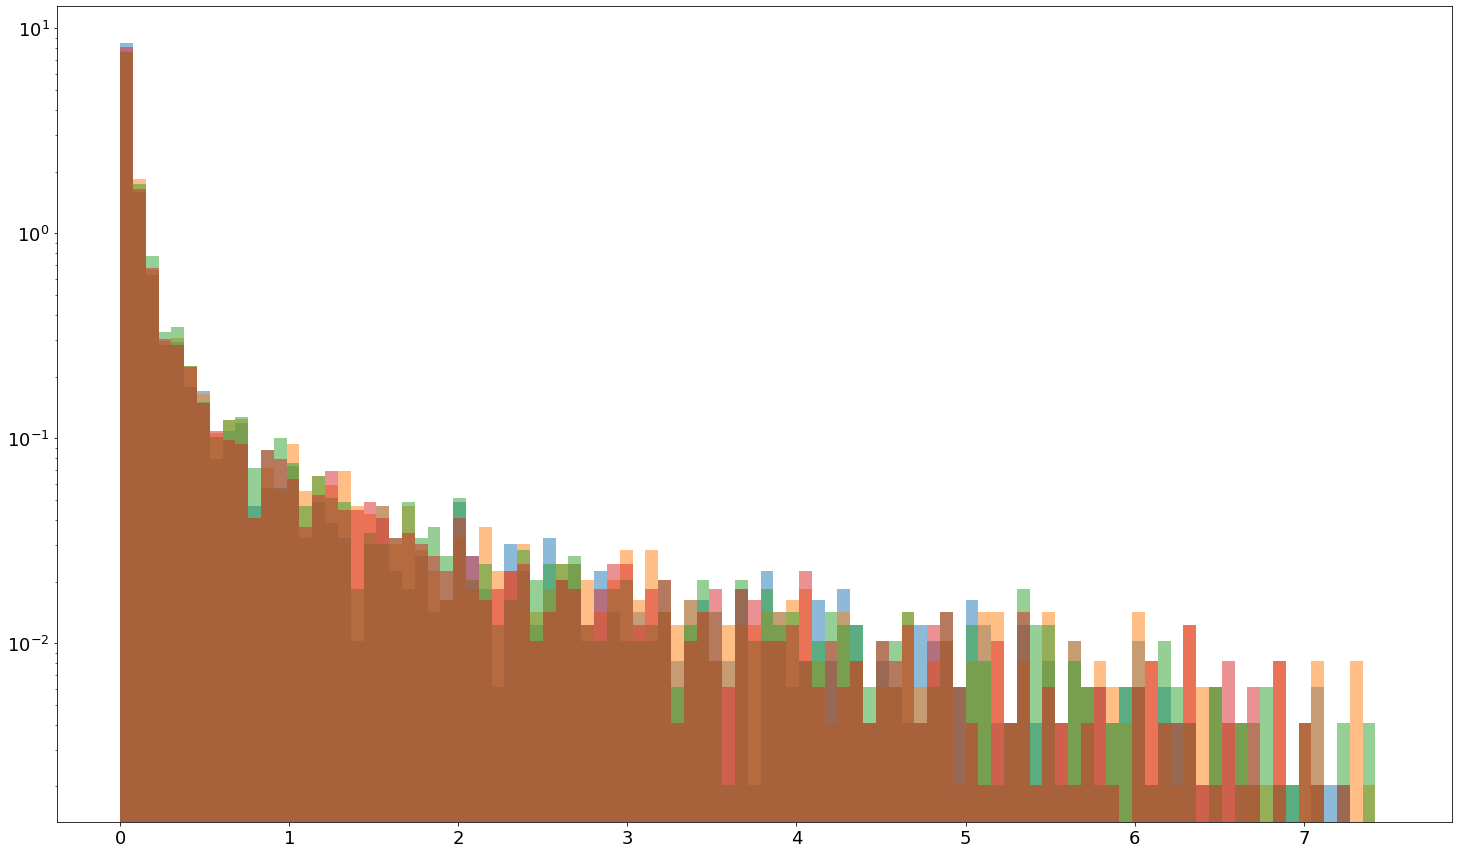

In [119]:
for quadrant in [muons_slices_firstquad, muons_slices_secondquad, muons_slices_thirdquad, muons_slices_fourthquad]:
    plt.hist(quadrant["std"], bins=bins, density=True, alpha=0.5)
plt.show()
for quadrant in [muons_slices_firstquad, muons_slices_secondquad, muons_slices_thirdquad, muons_slices_fourthquad]:
    plt.hist(quadrant["meanpe"], bins=np.linspace(0, 7.5, 100), density=True, alpha=0.5)
    plt.yscale("log")
plt.show()

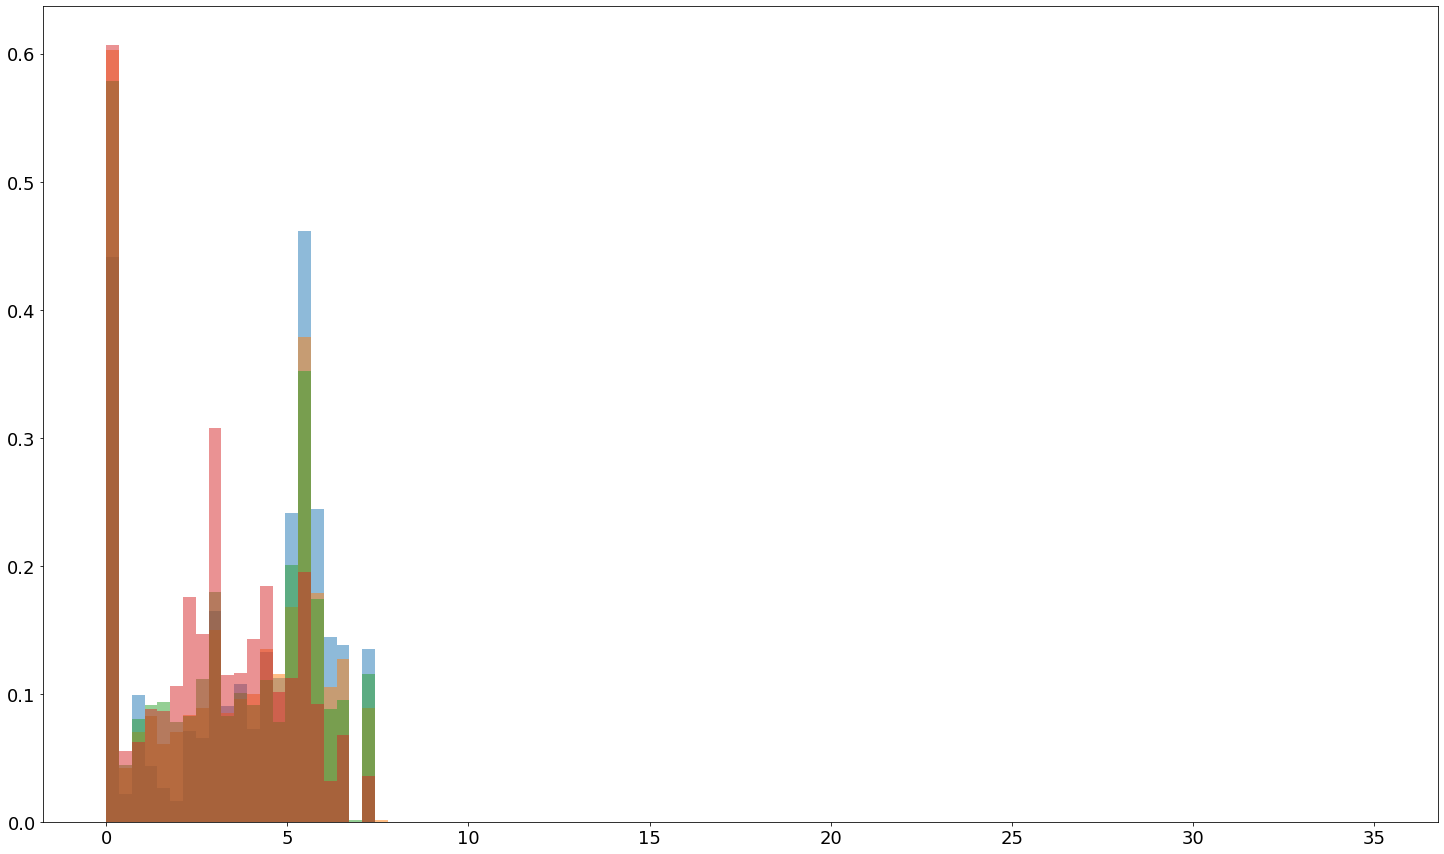

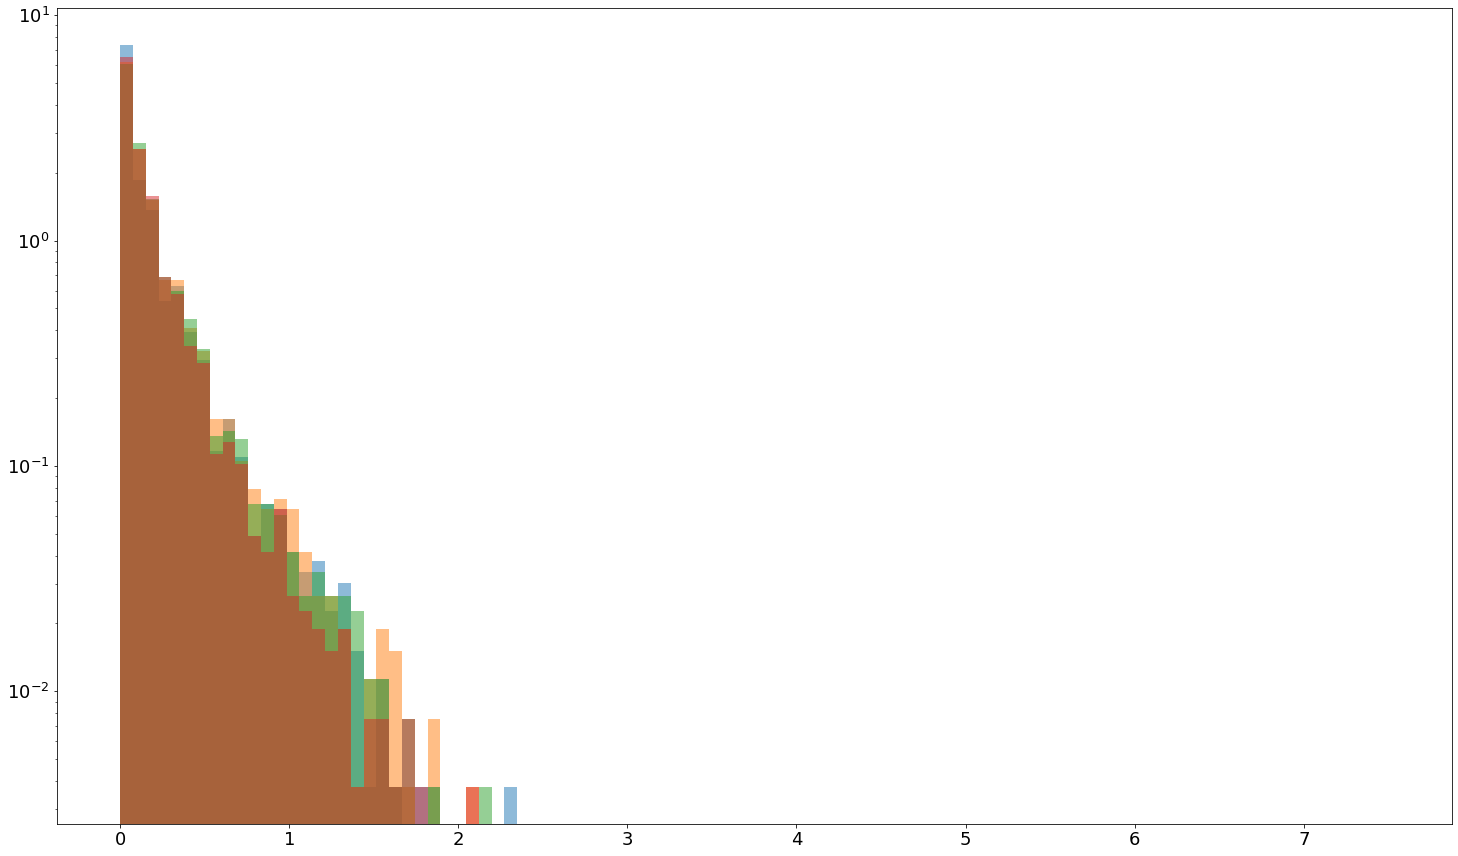

In [136]:
for quadrant in [ar39_1_slices_firstquad, ar39_1_slices_secondquad, ar39_1_slices_thirdquad, ar39_1_slices_fourthquad]:
    plt.hist(quadrant["std"], bins=bins, density=True, alpha=0.5)
plt.show()
for quadrant in [ar39_1_slices_firstquad, ar39_1_slices_secondquad, ar39_1_slices_thirdquad, ar39_1_slices_fourthquad]:
    plt.hist(quadrant["meanpe"], bins=np.linspace(0, 7.5, 100), density=True, alpha=0.5)
    plt.yscale("log")
plt.show()

In [82]:
ex = muons_slices_firstquad

In [110]:
ex["meanpe"] = ex.apply(lambda row: row[:36].mean(), axis=1)

/home/luigi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
ex.iloc[0]

slice0     0.000000
slice1     0.000000
slice2     0.000000
slice3     0.000000
slice4     0.000000
slice5     0.000000
slice6     0.000000
slice7     0.000000
slice8     0.000000
slice9     0.000000
slice10    0.000000
slice11    0.000000
slice12    0.000000
slice13    0.000000
slice14    0.000000
slice15    0.000000
slice16    0.000000
slice17    0.000000
slice18    0.000000
slice19    0.000000
slice20    0.000000
slice21    0.000000
slice22    0.000000
slice23    0.000000
slice24    0.000000
slice25    0.000000
slice26    0.000000
slice27    0.000000
slice28    0.000000
slice29    0.000000
slice30    2.000000
slice31    0.000000
slice32    0.000000
slice33    0.000000
slice34    0.000000
slice35    0.000000
std        0.000000
meanpe     0.055556
Name: 0, dtype: float64

In [101]:
ex.iloc[0, :36].sum()

2.0

In [126]:
muons_perquad = pd.DataFrame()
ar39_1_perquad = pd.DataFrame()
for i, quadrant in enumerate([muons_slices_firstquad, muons_slices_secondquad, muons_slices_thirdquad, muons_slices_fourthquad]):
    muons_perquad["q{}_meanpe".format(i+1)] = quadrant["meanpe"]
    muons_perquad["q{}_std".format(i+1)] = quadrant["std"]
for i, quadrant in enumerate([ar39_1_slices_firstquad, ar39_1_slices_secondquad, ar39_1_slices_thirdquad, ar39_1_slices_fourthquad]):
    ar39_1_perquad["q{}_meanpe".format(i+1)] = quadrant["meanpe"]
    ar39_1_perquad["q{}_std".format(i+1)] = quadrant["std"]

KeyboardInterrupt: 

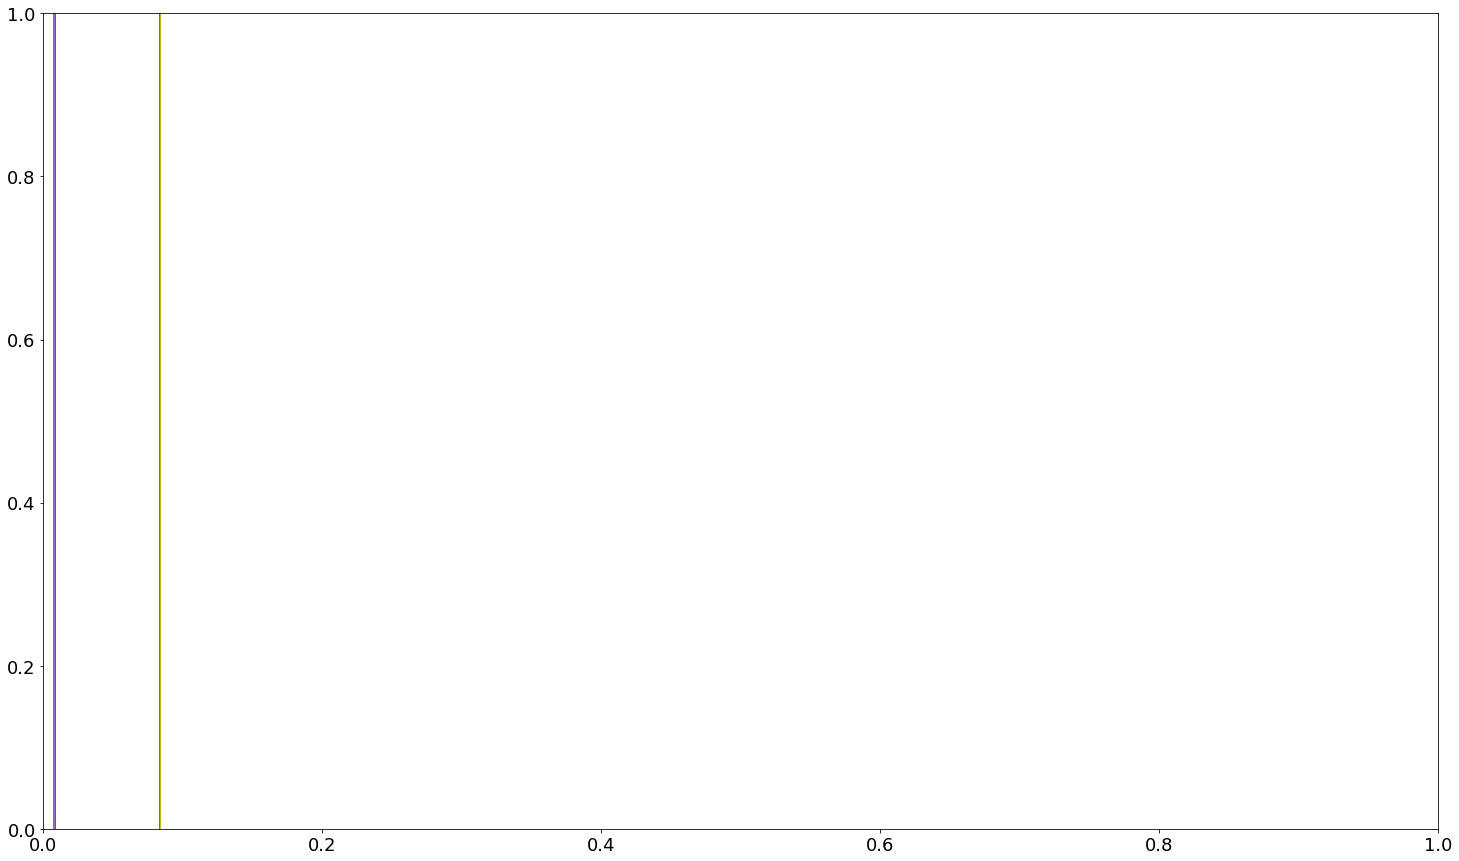

In [129]:
plt.hist(muons_perquad[["q1_meanpe", "q2_meanpe"]], bins=np.linspace(0, 7.5, 100))
plt.hist(ar39_1_perquad["q1_meanpe"], bins=np.linspace(0, 7.5, 100))
plt.show()

In [134]:
muons_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].describe()

,q1_meanpe,q2_meanpe,q3_meanpe,q4_meanpe
count,6473.000000,6473.000000,6473.000000,6473.000000
mean,0.332020,0.394948,0.377847,0.349121
std,0.930320,1.008260,0.962979,0.921765
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.027778,0.055556,0.055556,0.027778
75%,0.138889,0.194444,0.194444,0.166667
max,7.222222,7.361111,7.361111,7.222222


In [142]:
ar39_1_perquad[["q1_std", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].sum(axis=1).describe()

count    3500.000000
mean        0.609206
std         0.573724
min         0.055556
25%         0.222222
50%         0.444444
75%         0.777778
max         4.611111
dtype: float64

In [143]:
muons_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].max(axis=1).describe()

count    6473.000000
mean        0.701242
std         1.383414
min         0.027778
25%         0.027778
50%         0.111111
75%         0.472222
max         7.361111
dtype: float64

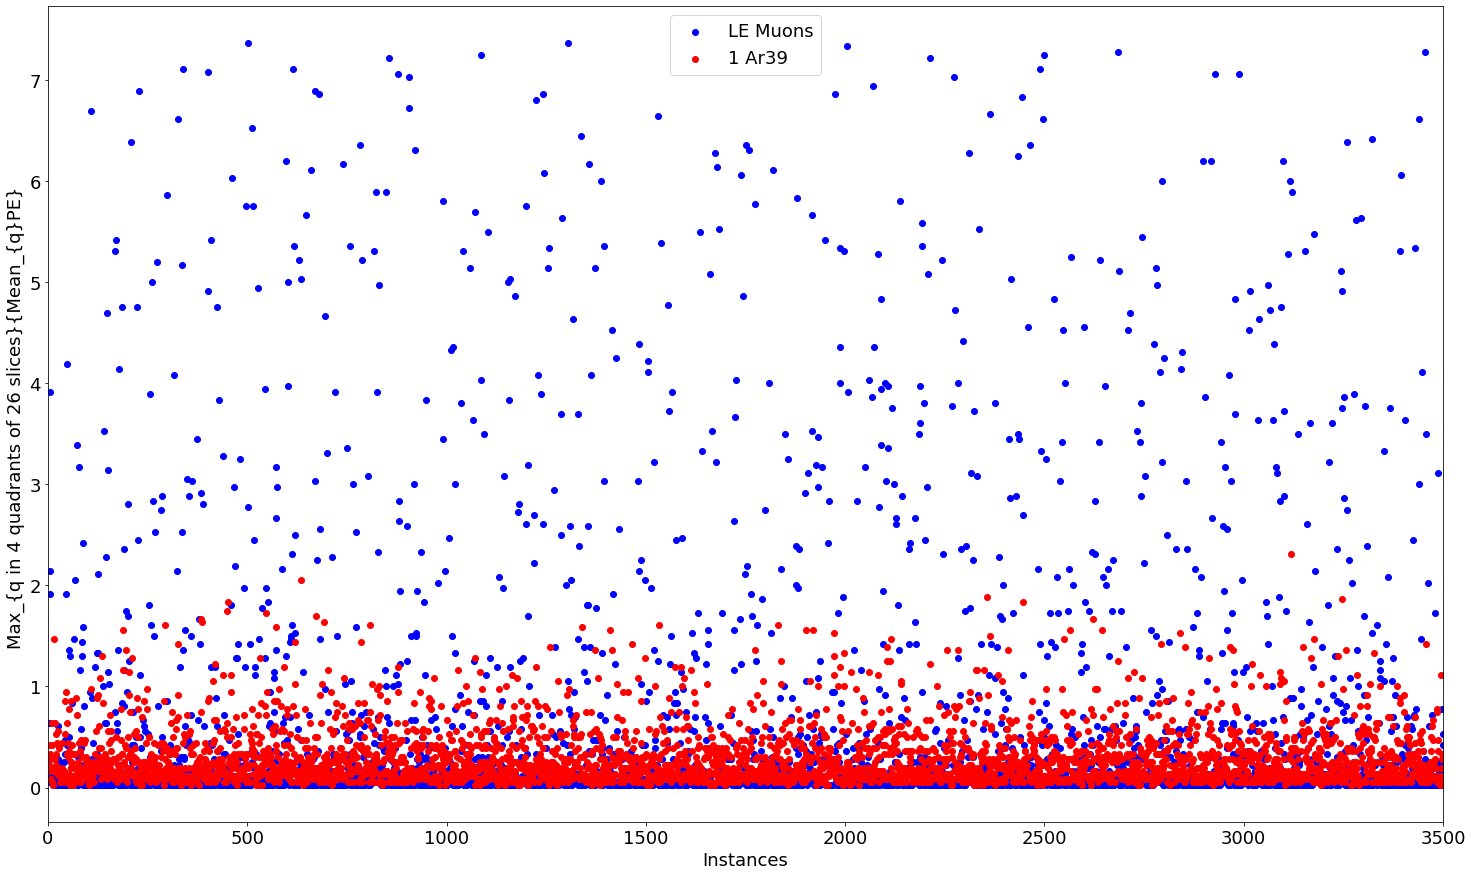

In [178]:
# compare average energy per quadrant
plt.scatter(muons_perquad.index.to_list(), muons_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].max(axis=1), c='b', label="LE Muons")
plt.scatter(ar39_1_perquad.index.to_list(), ar39_1_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].max(axis=1), c='r', label="1 Ar39")
plt.xlim(0, len(ar39_1_perquad))
plt.legend()
plt.xlabel("Instances")
plt.ylabel("Max_{q in 4 quadrants of 26 slices}{Mean_{q}PE} ")
plt.show()

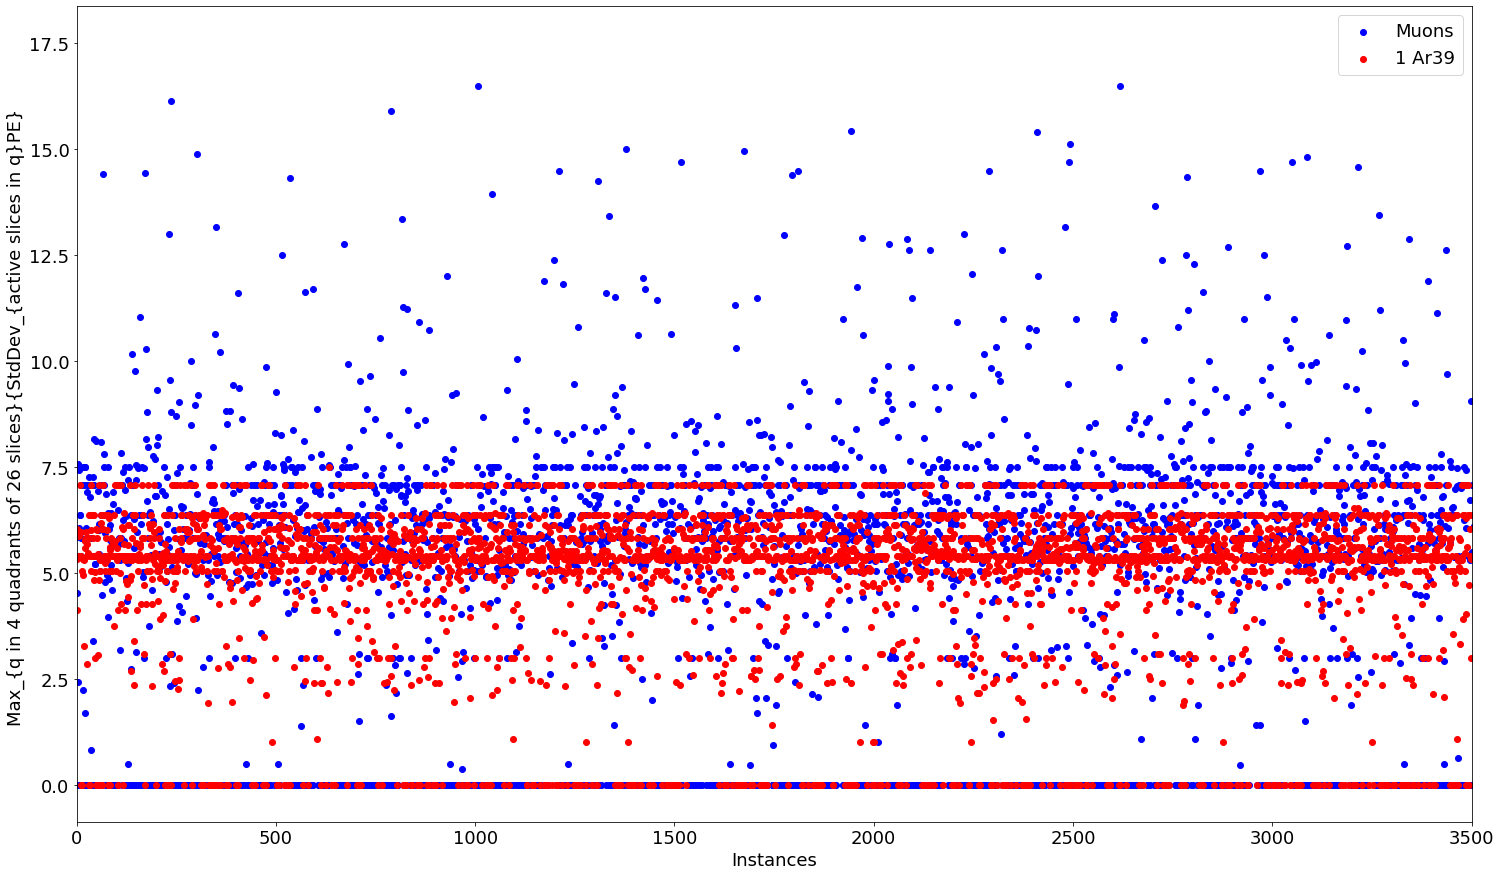

In [180]:
# compare average std dev of active slices per quadrant
plt.scatter(muons_perquad.index.to_list(), muons_perquad[["q1_std", "q2_std", "q3_std", "q4_std"]].max(axis=1), c='b', label="Muons")
plt.scatter(ar39_1_perquad.index.to_list(), ar39_1_perquad[["q1_std", "q2_std", "q3_std", "q4_std"]].max(axis=1), c='r', label="1 Ar39")
plt.xlim(0, len(ar39_1_perquad))
plt.legend()
plt.xlabel("Instances")
plt.ylabel("Max_{q in 4 quadrants of 26 slices}{StdDev_{active slices in q}PE} ")
plt.show()

### Recap on features engineering:
- split the 72 readouts in 4 shifted quadrants: [0:36], [15:51], [36:72], [51:15]
- for each of this quadrant, compute: mean PE detected, std deviation of population of active slices
- the second one: population means [id] * PE[id]

In [205]:
mask_std = ar39_1_perquad[["q1_std", "q2_std", "q3_std", "q4_std"]].max(axis=1)<7.1
mask_meanpe = ar39_1_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].max(axis=1)<2
print("TN: {}".format(len(ar39_1_perquad[(mask_std) & (mask_meanpe)])))
print("FP: {}".format(len(ar39_1_perquad[~(mask_std) | ~(mask_meanpe)])))

mask_std = muons_perquad[["q1_std", "q2_std", "q3_std", "q4_std"]].max(axis=1)>=7.1
mask_meanpe = muons_perquad[["q1_meanpe", "q2_meanpe", "q3_meanpe", "q4_meanpe"]].max(axis=1)>=2
print("FN: {}".format(len(muons_perquad[~(mask_std) | ~(mask_meanpe)])))
print("TP: {}".format(len(muons_perquad[(mask_std) & (mask_meanpe)])))

print("Tot Ar39: {}".format(len(ar39_1_perquad)))
print("Tot Mu: {}".format(len(muons_perquad)))

TN: 3497
FP: 3
FN: 6320
TP: 153
Tot Ar39: 3500
Tot Mu: 6473


In [207]:
153/156

0.9807692307692307